In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

In [13]:
y_train_cat = to_categorical(y_train, 10)
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
y_test_cat = to_categorical(y_test, 10)
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

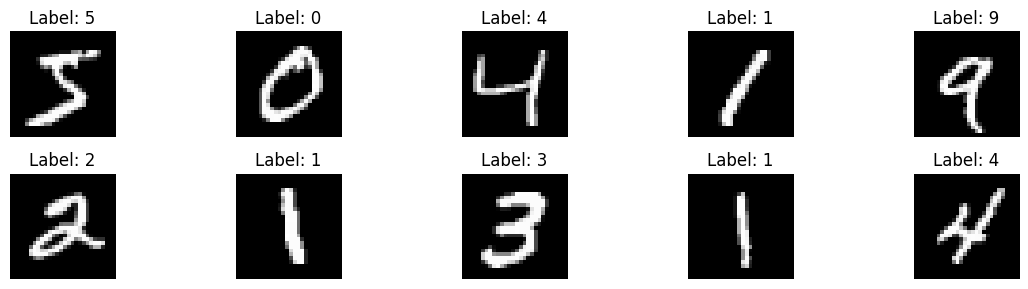

In [21]:
fig, axes = plt.subplots(2,5, figsize = (12,3))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row,col].imshow(X_train[i].reshape(28,28), cmap = 'gray')
    axes[row,col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

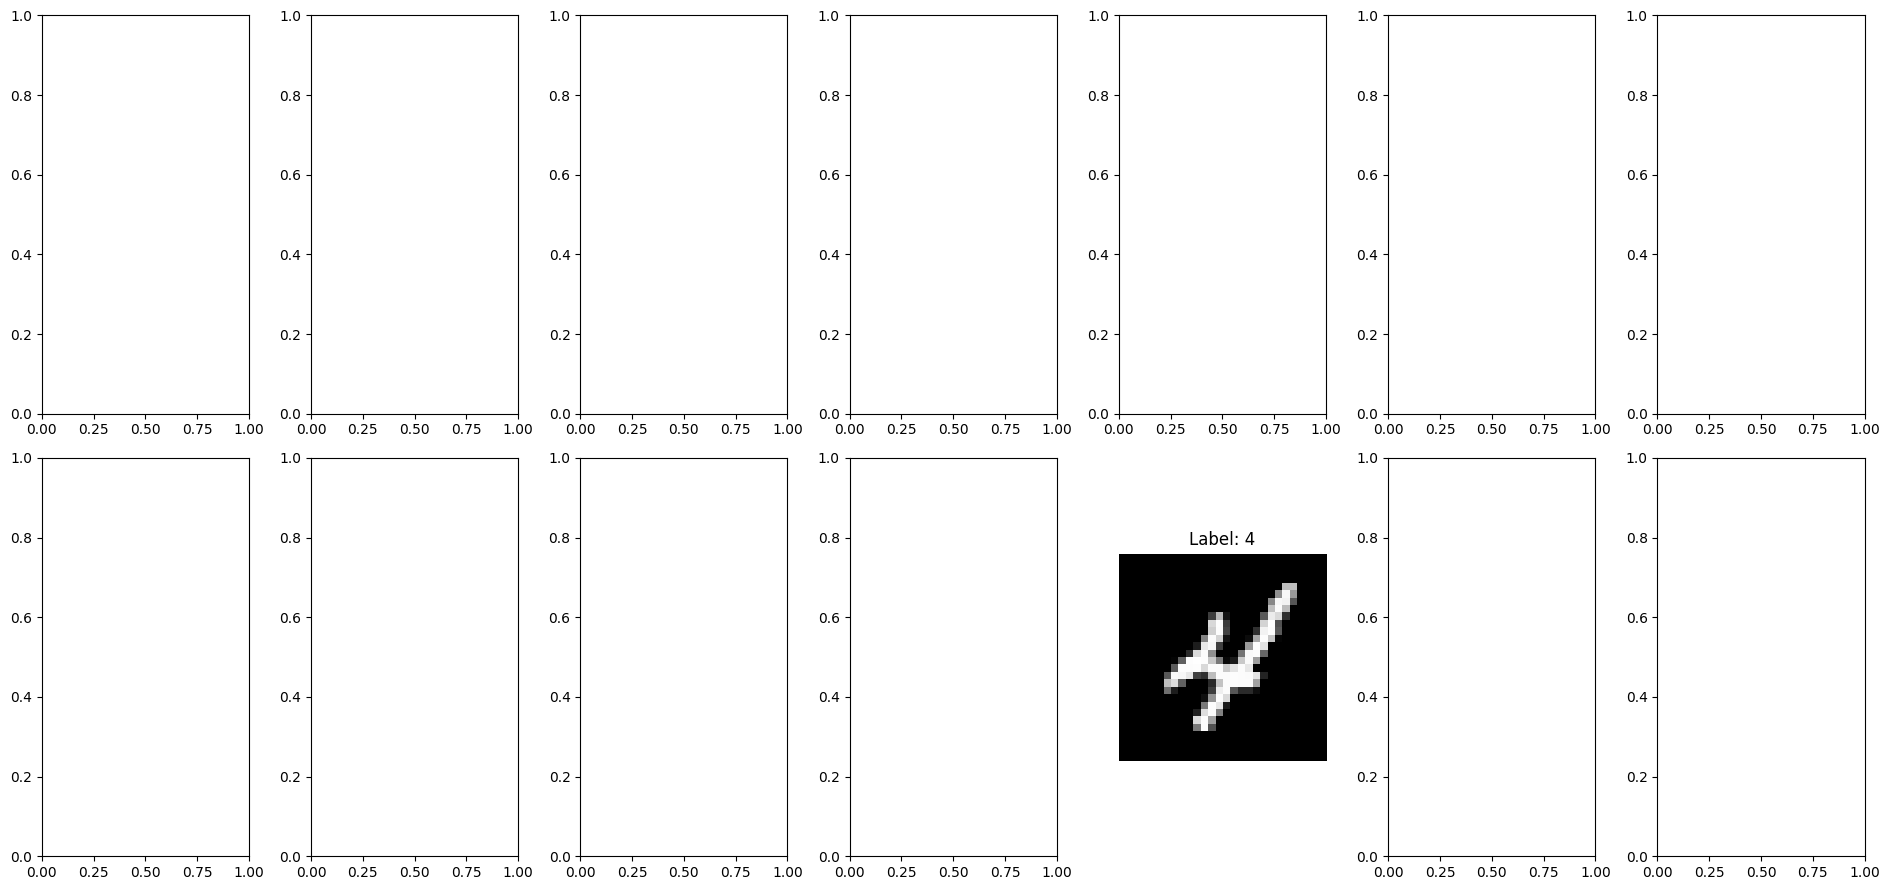

In [22]:
fig, axes = plt.subplots(2, 7, figsize = (19,9))
axes = np.array(axes).reshape(2,7)
for i in range(10):
    r,c = divmod(i,7)
    axes[row,col].imshow(X_train[i].reshape(28,28), cmap = 'gray')
    axes[row,col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    # learns features, edges, textures, shapes
    # each filter different features
    # kernel size (3,3)
    layers.BatchNormalization(), 
    layers.Conv2D(32, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    
    #Pool size (2,2)
    layers.Dropout(0.25),
    #Randomly sets 25% of inputs to zero during training
    #improve generalization
    #force the model to not rely on specific neurons
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation = 'softmax')
    
])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 600,938 (2.29 MB)

 Trainable params: 600,874 (2.29 MB)

 Non-trainable params: 64 (256.00 B)

In [26]:
model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [27]:
history = model.fit(X_train, y_train_cat, 
                   epochs = 5, 
                   batch_size = 200, 
                   validation_split=0.2,
                   verbose = 1)

Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.8164 - loss: 0.5714 - val_accuracy: 0.9778 - val_loss: 0.9982
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9683 - loss: 0.1073 - val_accuracy: 0.9843 - val_loss: 0.1063
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9764 - loss: 0.0738 - val_accuracy: 0.9852 - val_loss: 0.0508
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9825 - loss: 0.0569 - val_accuracy: 0.9880 - val_loss: 0.0414
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9836 - loss: 0.0488 - val_accuracy: 0.9901 - val_loss: 0.0362


In [29]:
#Evaluation of the model on test data
test_loss, test_acc = model.evaluate(X_test , y_test_cat, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9849 - loss: 0.0451
